In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

In [75]:
train=pd.read_csv("C:\\unikaksha\\datascience\\project_DS\\MINI - 8 - Predicting the Survival of Titanic Passengers using Random Forest Algorithm\\train.csv")
test=pd.read_csv("C:\\unikaksha\\datascience\\project_DS\\MINI - 8 - Predicting the Survival of Titanic Passengers using Random Forest Algorithm\\test.csv")

In [76]:
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Visualization

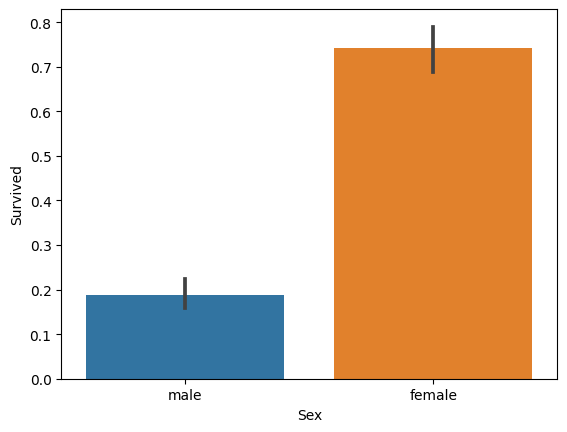

In [77]:
sns.barplot(x=train["Sex"],y=train["Survived"])
plt.show()

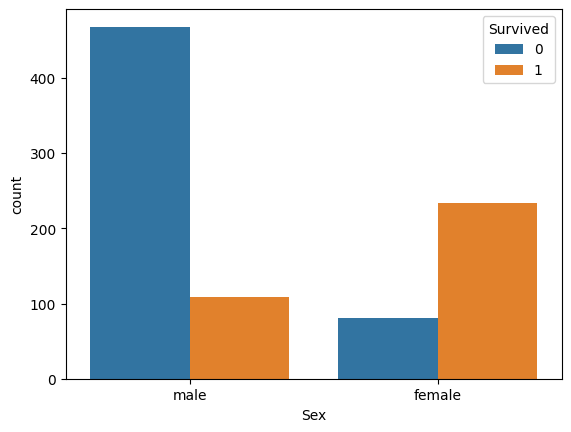

In [78]:
sns.countplot(x=train["Sex"],hue=train["Survived"])
plt.show()

#### Missing Value Imptuation

In [79]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [80]:
train.columns[train.isna().any()].tolist()

['Age', 'Cabin', 'Embarked']

In [81]:
train.drop(columns=["Cabin","Name","Ticket"],axis=1,inplace=True)
train["Age"].fillna(np.mean(train["Age"]),inplace=True)
train["Embarked"].fillna(train["Embarked"].mode()[0],inplace=True)
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [82]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [83]:
test.drop(columns=["Cabin","Name","Ticket"],axis=1,inplace=True)
test["Age"].fillna(np.mean(train["Age"]),inplace=True)
test["Fare"].fillna(np.mean(train["Fare"]),inplace=True)
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

#### Data preprocessing

In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [87]:
train["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [91]:
train["Sex"]=train["Sex"].map({"male":0,"female":1})
train["Embarked"]=train["Embarked"].map({"S":0,"C":1,"Q":2})
test["Sex"]=test["Sex"].map({"male":0,"female":1})
test["Embarked"]=test["Embarked"].map({"S":0,"C":1,"Q":2})

#### Trian test split

In [113]:
x_t=train.drop(columns="Survived")
y_t=train["Survived"]
print("shape of x_train: ",x_train.shape)
print("shape of y_train: ",y_train.shape)

shape of x_train:  (712, 8)
shape of y_train:  (712,)


In [114]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y_t,test_size=0.20)

In [119]:
#criterion{“gini”, “entropy”, “log_loss”}
#max_depth{50,100,150,200}
#n_estimators{50,100,150,200}
model=RandomForestClassifier(n_estimators=100,criterion="gini")
model.fit(x_train,y_train)
y_act=y_test
y_pred=model.predict(x_test)


In [120]:
accuracy_score(y_act,y_pred)

0.8435754189944135

In [ ]:
x_train.to_csv("titanic_cleaned_data")